In [1]:
from google.colab import files
uploaded = files.upload()

Saving Lembang_Merged_SPI.csv to Lembang_Merged_SPI.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline
sns.set(style='whitegrid')

In [3]:
# Load dataset yang telah digabung (NDVI, LST, CHIRPS, SPI)
data = pd.read_csv('Lembang_Merged_SPI.csv')
data.head()

,date,lon,lat,LST,NDVI,CHIRPS,SPI_1,SPI_3
0,2013-06-01,107.604717,-6.858585,21.344857,0.545390,128.610135,-0.254755,NaN
1,2013-07-01,107.604717,-6.858585,28.777342,0.594455,154.067524,-0.045195,NaN
2,2013-08-01,107.604717,-6.858585,32.738827,0.527932,23.503474,-1.119972,-0.473308
3,2013-09-01,107.604717,-6.858585,36.640497,0.450170,57.504196,-0.840085,-0.668418
4,2013-10-01,107.604717,-6.858585,37.471076,0.454753,140.145514,-0.159798,-0.706619


In [4]:
# Informasi umum dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50959 entries, 0 to 50958
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    50959 non-null  object 
 1   lon     50959 non-null  float64
 2   lat     50959 non-null  float64
 3   LST     50959 non-null  float64
 4   NDVI    50959 non-null  float64
 5   CHIRPS  50959 non-null  float64
 6   SPI_1   50959 non-null  float64
 7   SPI_3   48959 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [5]:
# Cek missing values
data.isnull().sum()

,0
date,0
lon,0
lat,0
LST,0
NDVI,0
CHIRPS,0
SPI_1,0
SPI_3,2000


In [6]:
# Statistik deskriptif dari fitur utama
data[['NDVI', 'LST', 'CHIRPS', 'SPI_3']].describe()

,NDVI,LST,CHIRPS,SPI_3
count,50959.000000,50959.000000,50959.000000,48959.000000
mean,0.652436,25.003588,173.248574,-0.016985
std,0.203600,10.288404,140.923359,0.665321
min,-0.061767,-123.148520,10.235057,-1.308453
25%,0.554126,21.796036,45.330579,-0.568808
50%,0.711869,26.253134,142.495648,-0.015197
75%,0.803304,30.628200,279.082241,0.505853
max,0.999786,52.530872,1029.249809,2.172115


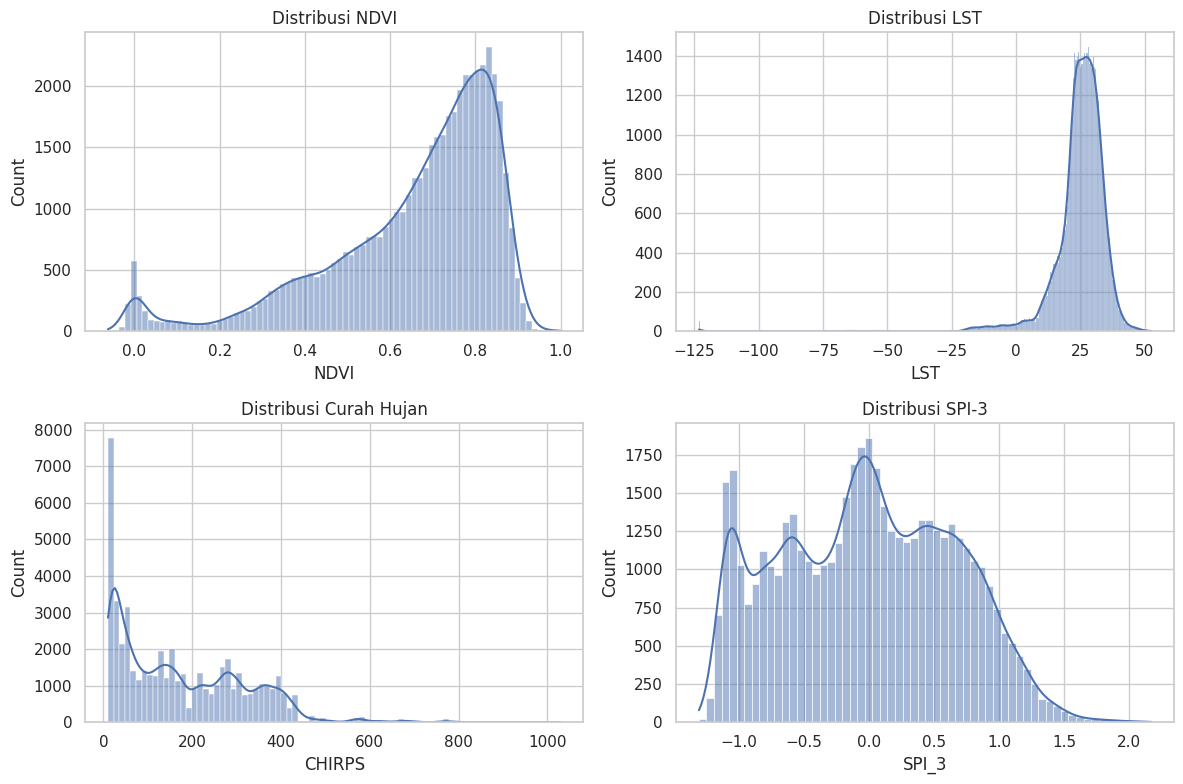

In [7]:
# Visualisasi distribusi fitur-fitur
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(data['NDVI'], kde=True, ax=axs[0,0])
axs[0,0].set_title('Distribusi NDVI')
sns.histplot(data['LST'], kde=True, ax=axs[0,1])
axs[0,1].set_title('Distribusi LST')
sns.histplot(data['CHIRPS'], kde=True, ax=axs[1,0])
axs[1,0].set_title('Distribusi Curah Hujan')
sns.histplot(data['SPI_3'], kde=True, ax=axs[1,1])
axs[1,1].set_title('Distribusi SPI-3')
plt.tight_layout()

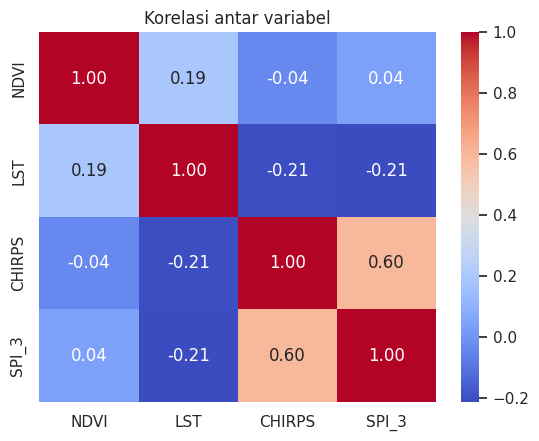

In [8]:
# Korelasi antar fitur
corr = data[['NDVI', 'LST', 'CHIRPS', 'SPI_3']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar variabel')
plt.show()

In [9]:
# Drop semua baris dengan NaN di fitur atau target
data = data.dropna(subset=['NDVI', 'LST', 'CHIRPS', 'SPI_3'])

In [10]:
# Definisikan fitur dan target
X = data[['NDVI', 'LST', 'CHIRPS']]
y = data['SPI_3']

In [11]:
# Split data menjadi latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)  # Tanpa akar
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'R2': r2}


In [13]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_eval = evaluate_model(y_test, rf_pred)

# KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_eval = evaluate_model(y_test, knn_pred)

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_eval = evaluate_model(y_test, gb_pred)

In [14]:
# Gabungkan hasil evaluasi
results = pd.DataFrame([rf_eval, knn_eval, gb_eval], index=['Random Forest', 'KNN', 'Gradient Boosting'])
results

,MSE,MAE,R2
Random Forest,0.073369,0.180411,0.836806
KNN,0.102214,0.218071,0.772647
Gradient Boosting,0.160210,0.320244,0.643648


In [15]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=results)

https://docs.google.com/spreadsheets/d/12Pq1bOsAzKiASRYFpaoycQ6OOaU-k2c5DtxgS8t2N8I/edit#gid=0


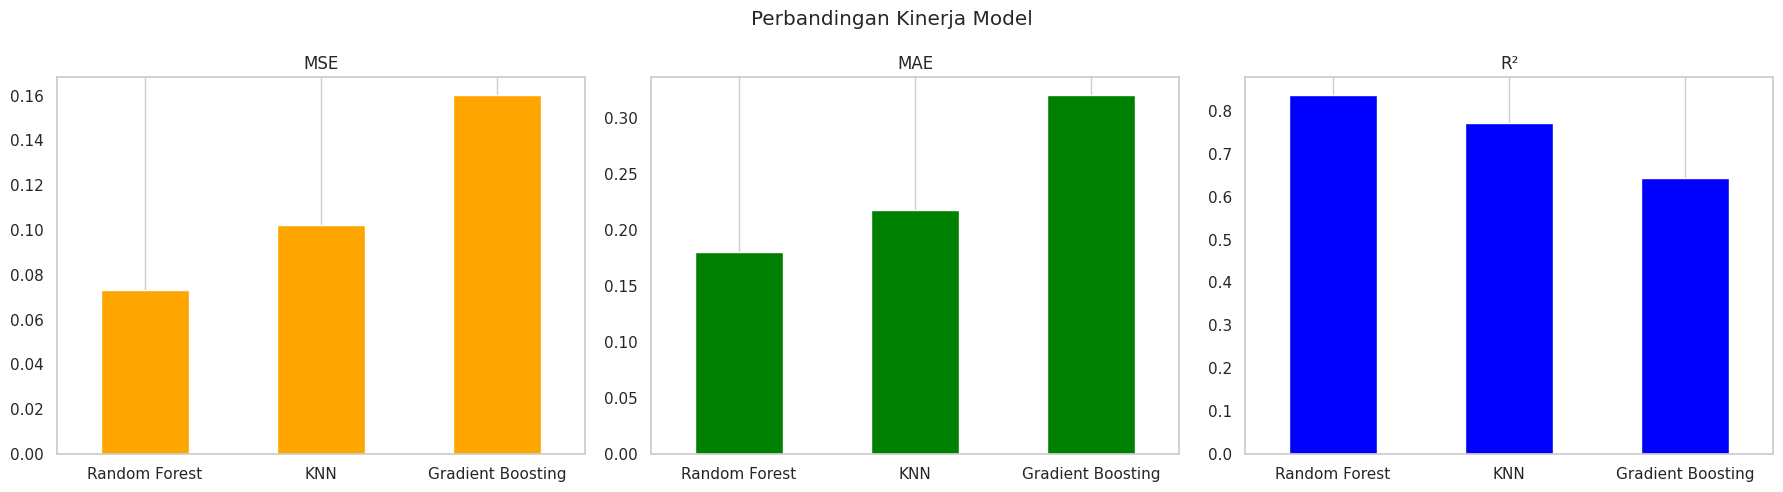

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

results[['MSE']].plot(kind='bar', ax=axs[0], color='orange', legend=False)
axs[0].set_title('MSE')
axs[0].grid(axis='y')

results[['MAE']].plot(kind='bar', ax=axs[1], color='green', legend=False)
axs[1].set_title('MAE')
axs[1].grid(axis='y')

results[['R2']].plot(kind='bar', ax=axs[2], color='blue', legend=False)
axs[2].set_title('R²')
axs[2].grid(axis='y')

for ax in axs:
    ax.set_xticklabels(results.index, rotation=0)

plt.suptitle('Perbandingan Kinerja Model')
plt.tight_layout()
plt.show()

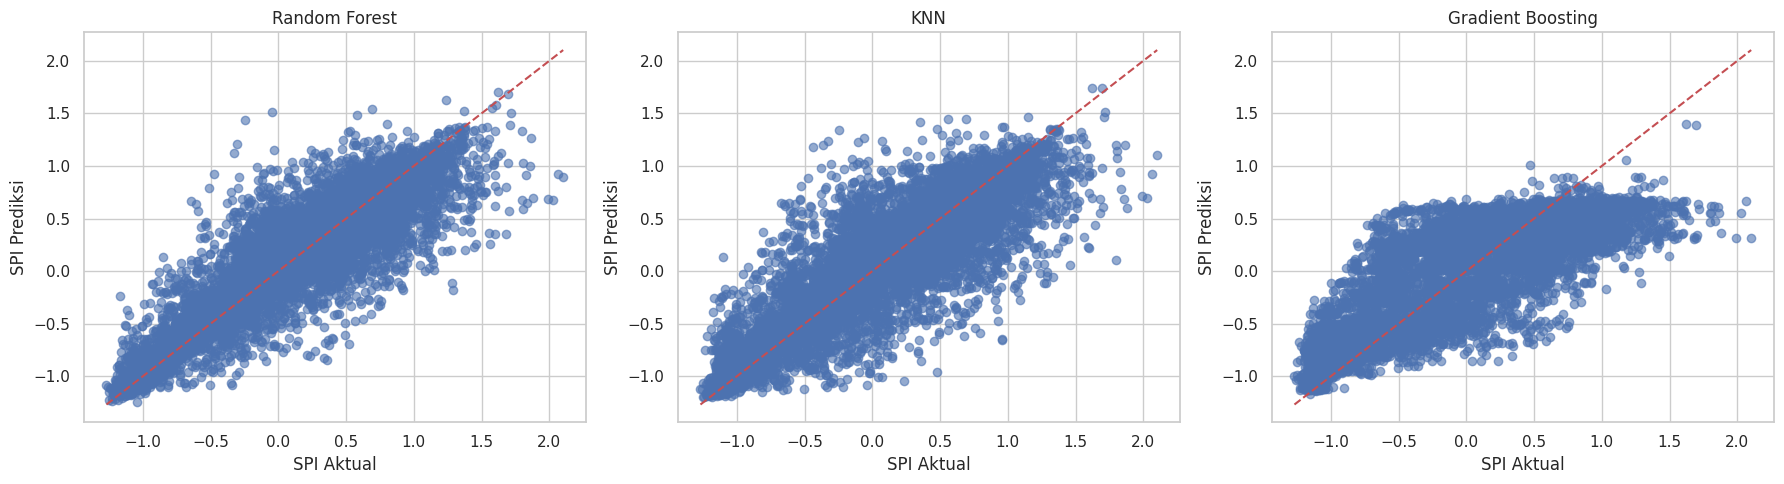

In [17]:
# Scatter plot prediksi vs aktual
models = {'Random Forest': rf_pred, 'KNN': knn_pred, 'Gradient Boosting': gb_pred}
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, pred) in zip(axs, models.items()):
    ax.scatter(y_test, pred, alpha=0.6)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(name)
    ax.set_xlabel('SPI Aktual')
    ax.set_ylabel('SPI Prediksi')
plt.tight_layout()
plt.show()

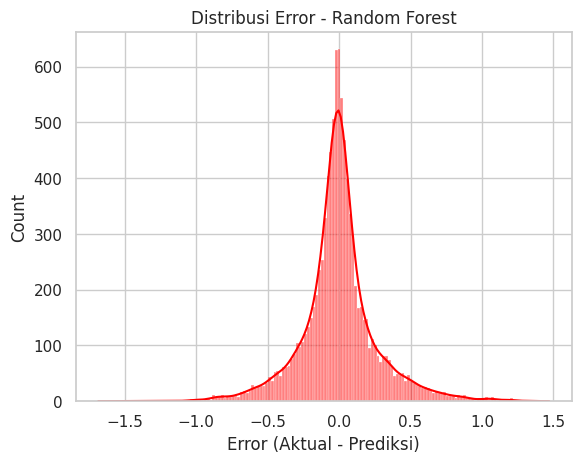

In [18]:
#Distribusi eror
errors = y_test - rf_pred
sns.histplot(errors, kde=True, color='red')
plt.title('Distribusi Error - Random Forest')
plt.xlabel('Error (Aktual - Prediksi)')
plt.show()


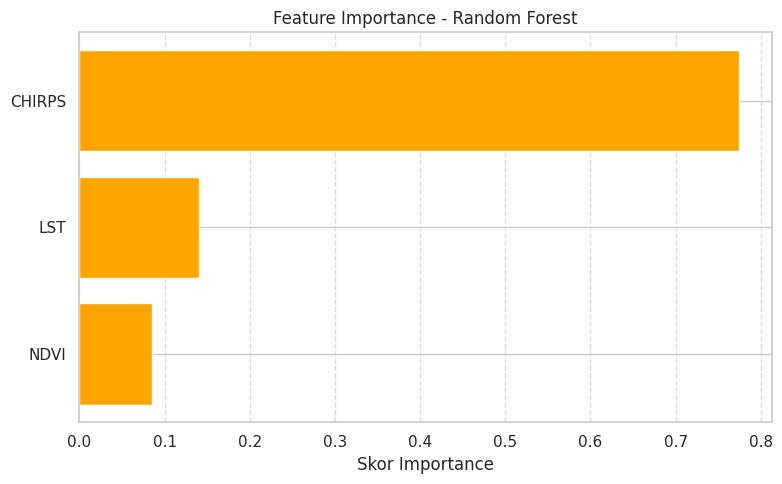

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ambil nilai importance dari model
importances = rf.feature_importances_
feature_names = X.columns

# Buat DataFrame biar gampang diurutkan
importance_df = pd.DataFrame({
    'Fitur': feature_names,
    'Skor Importance': importances
}).sort_values(by='Skor Importance', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Fitur'], importance_df['Skor Importance'], color='orange')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Skor Importance')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


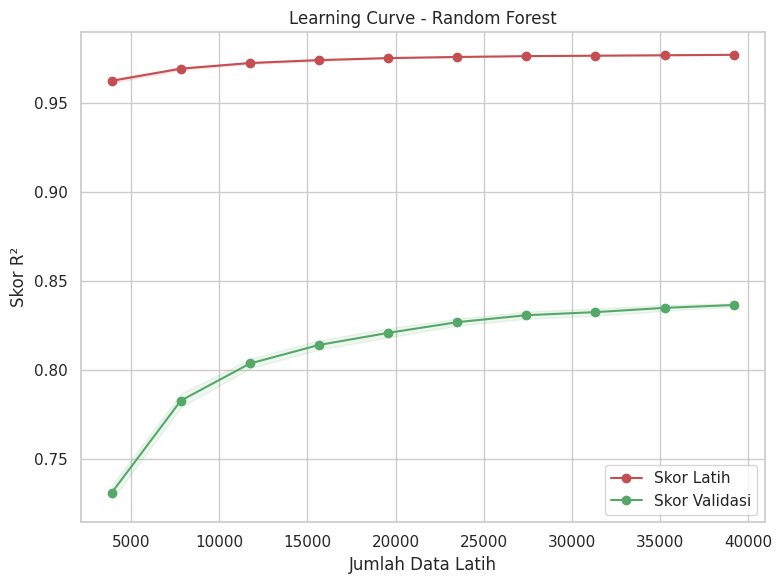

In [20]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Konfigurasi
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Hitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=cv, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Hitung rata-rata dan standar deviasi
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Skor Latih")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Skor Validasi")

plt.title("Learning Curve - Random Forest")
plt.xlabel("Jumlah Data Latih")
plt.ylabel("Skor R²")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])


model_dict = {'KNN': knn, 'RF': rf, 'Boosting': gb}


for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3


mse

,train,test
KNN,0.000065,0.000102
RF,0.00001,0.000073
Boosting,0.000159,0.00016


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48959 entries, 2 to 50958
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    48959 non-null  object 
 1   lon     48959 non-null  float64
 2   lat     48959 non-null  float64
 3   LST     48959 non-null  float64
 4   NDVI    48959 non-null  float64
 5   CHIRPS  48959 non-null  float64
 6   SPI_1   48959 non-null  float64
 7   SPI_3   48959 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.4+ MB


In [28]:
# Ambil indeks dari y_test[:10]
index_sampel = y_test[:10].index

# Ambil tanggal yang sesuai dari df 'data'
tanggal = data.loc[index_sampel, 'date'].values

# Buat prediksi dari 10 sampel pertama
prediksi = X_test.loc[index_sampel].copy()

# Buat dictionary hasil prediksi
pred_dict = {'date': tanggal, 'y_true': y_test.loc[index_sampel].values}
for name, model in model_dict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(2)

# Buat dataframe hasil
hasil_prediksi = pd.DataFrame(pred_dict)


In [29]:
hasil_prediksi

,date,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
0,2019-05-01,0.776919,0.77,0.79,0.25
1,2019-08-01,-0.723810,-0.82,-0.91,-0.81
2,2014-09-01,-0.737606,-0.48,-0.68,-0.65
3,2018-09-01,-1.121422,-1.02,-1.08,-0.81
4,2013-08-01,-0.237327,-0.13,-0.14,-0.30
5,2020-04-01,0.114048,0.09,0.11,0.53
6,2015-10-01,-1.078065,-0.55,-1.08,-0.77
7,2020-07-01,-0.065351,0.38,-0.07,0.02
8,2016-08-01,0.284227,0.41,0.35,0.05
9,2016-06-01,0.639705,0.53,0.81,0.52


In [ ]:
# Simpan hasil evaluasi ke file
results.to_csv('Evaluasi_Model_ML.csv')